In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("incl/")


import narrom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

trajectories = trajectories[::10]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

100 loaded with n_kmax = 200


In [3]:
from sklearn.decomposition import NMF

In [4]:
test_trajectory = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/example_run.npz')[0].T
print('example trajectory loaded with shape: ', test_trajectory.shape)

example trajectory loaded with shape:  (400, 200)


In [34]:
rdim = 100

dim_reducer = narrom.dim_reducer.NNMF(max_iter = 5000)

model = narrom.utils.reducer_helper_class(trajectories, dim_reducer)
model.train(rdim=rdim)



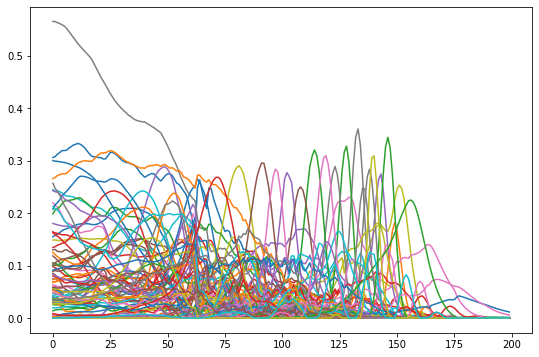

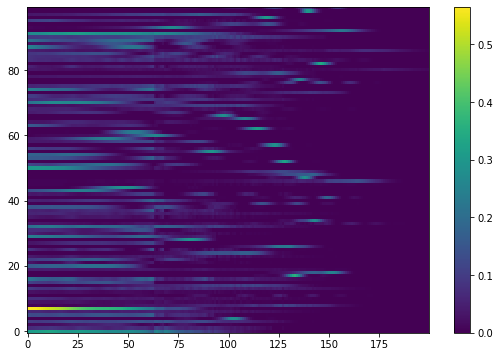

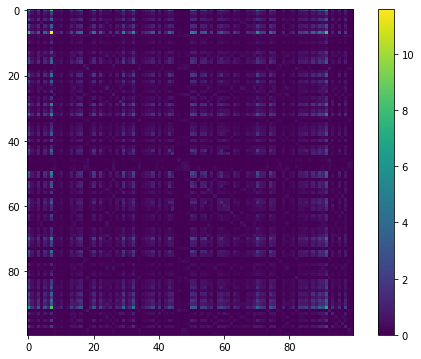

In [35]:
H = dim_reducer.model.components_

for k in range(rdim):
    plt.plot(H[k])
    
plt.show()

plt.imshow(H, aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()


plt.imshow(H @ H.T)
plt.colorbar()
plt.show()

0.001957167781415139
0.06398880550139019


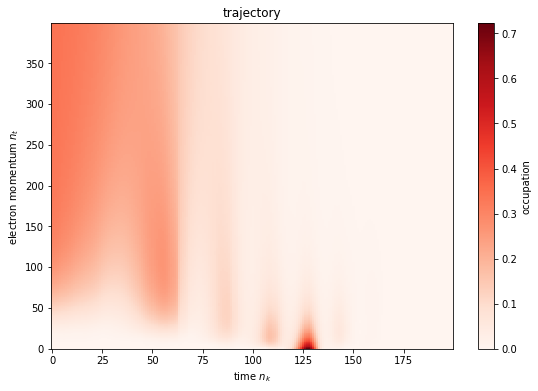

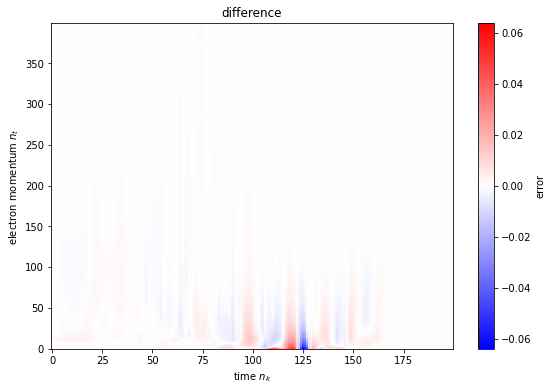

In [37]:
# test = trajectories[9]
test = test_trajectory

recon = model.approx_single_run(test)

print(model.get_error(test, recon, rdim=rdim, norm='NF'))
print(model.get_error(test, recon, rdim=rdim, norm='max'))

narrom.utils.plot_trajectory(recon)

narrom.utils.plot_difference(test=recon, truth=test)

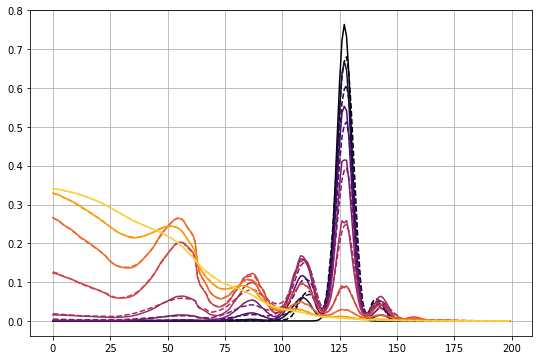

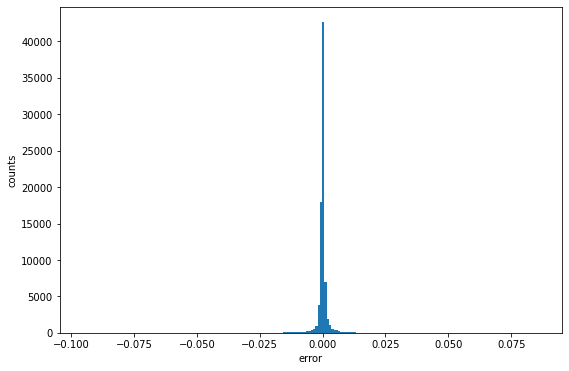

In [23]:
pl_colors = plt.get_cmap('inferno')

tn_arr = [0,2,5,10,20,50,100,200,399]

plt.grid()

for k,tn in enumerate(tn_arr):
    plt.plot(test[tn], '-', c=pl_colors(k/len(tn_arr)))
    plt.plot(recon[tn], '--', c=pl_colors(k/len(tn_arr)))

plt.show()


plt.hist(np.ravel(recon-test_trajectory), bins = 200)
plt.xlabel('error')
plt.ylabel('counts')
plt.show()